In [4]:
import numpy as np
import pandas as pd
import nltk

In [5]:
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('imdb_labelled.csv')
print(df)

                                                                                                                                                                                             text  \
0                                                                                                         A very, very, very slow-moving, aimless movie about a distressed, drifting young man.     
1                                                                                             Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.     
2    Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.     
3                                                                                                                                                    Very little music or anything to speak of.     
4              

In [6]:
df.head()

,text,label
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1


In [7]:
df.tail()

,text,label
743,I just got bored watching Jessice Lange take her clothes off!,0
744,"Unfortunately, any virtue in this film's production work was lost on a regrettable script.",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0
747,All in all its an insult to one's intelligence and a huge waste of money.,0


In [8]:
#Classes are considered balanced when classes (roughly) account for the same portion of the total observations
df['label'].value_counts()
#assume it has balanced classes

1    386
0    362
Name: label, dtype: int64

In [9]:
#we take a sample 
sample = df.text[0]
sample

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [14]:
from nltk.tokenize import word_tokenize
sample_tokens = word_tokenize(sample)
print(sample_tokens)

['A', 'very', ',', 'very', ',', 'very', 'slow-moving', ',', 'aimless', 'movie', 'about', 'a', 'distressed', ',', 'drifting', 'young', 'man', '.']


In [16]:
from nltk import bigrams

In [18]:
sample_bitokens = list(bigrams(sample_tokens))
print(sample_bitokens)

[('A', 'very'), ('very', ','), (',', 'very'), ('very', ','), (',', 'very'), ('very', 'slow-moving'), ('slow-moving', ','), (',', 'aimless'), ('aimless', 'movie'), ('movie', 'about'), ('about', 'a'), ('a', 'distressed'), ('distressed', ','), (',', 'drifting'), ('drifting', 'young'), ('young', 'man'), ('man', '.')]


In [22]:
#frequency 
from nltk import FreqDist
sample_freqdist = FreqDist(sample_tokens)
sample_freqdist

FreqDist({',': 4, 'very': 3, 'A': 1, 'slow-moving': 1, 'aimless': 1, 'movie': 1, 'about': 1, 'a': 1, 'distressed': 1, 'drifting': 1, ...})

In [27]:
#alternatively you can create a function to perform all the above 
def top_n(text, n):
    tokens = word_tokenize(text)
    freqdist = FreqDist(tokens)
    return freqdist.most_common(n)
top_n(df.text[1], 10)

[('the', 2),
 ('Not', 1),
 ('sure', 1),
 ('who', 1),
 ('was', 1),
 ('more', 1),
 ('lost', 1),
 ('-', 1),
 ('flat', 1),
 ('characters', 1)]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer 

In [29]:
def create_dtm(series):
    cv = CountVectorizer()
    dtm = cv.fit_transform(series)
    dtm = dtm.todense()
    features = cv.get_feature_names_out()
    dtm_df = pd.DataFrame(dtm, columns = features)
    return dtm_df

create_dtm(df.text.head())
    
    

,about,acting,aimless,almost,and,angles,anything,artiness,as,attempting,...,trying,very,walked,was,when,white,who,whom,with,young
0,1,0,1,0,0,0,0,0,0,0,...,0,3,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,1,0,0
2,0,1,0,1,3,1,0,1,1,1,...,0,0,0,1,0,1,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0


In [30]:
#to perform logistic regression 
from sklearn.linear_model import LogisticRegression
def top_n_tokens(text, sentiment, n):
    lgr = LogisticRegression(solver = 'lbfgs', max_iter = 2500, random_state = 1234)
    cv = CountVectorizer()
    dtm = cv.fit_transform(text)
    lgr.fit(dtm, sentiment)
    coefs = lgr.coef_[0]
    features = cv.get_feature_names_out()
    df = pd.DataFrame({'Tokens' : features, 'Coefficients' : coefs})
    return df.nlargest(n, 'Coefficients')

# Test it on the df['text']
top_n_tokens(df.text, df.label, 10)

,Tokens,Coefficients
1567,liked,1.286747
2997,wonderful,1.242158
1104,funny,1.112821
1182,great,1.068772
2949,well,1.043139
246,beautiful,1.042833
0,10,1.035405
344,brilliant,1.014080
908,excellent,1.009914
2203,right,0.985806


In [32]:
def bottom_n_tokens(text, sentiment, n):
    lgr = LogisticRegression(solver = 'lbfgs', max_iter = 2500, random_state = 1234)
    cv = CountVectorizer()
    dtm = cv.fit_transform(text)
    lgr.fit(dtm, sentiment)
    coefs = lgr.coef_[0]
    features = cv.get_feature_names_out()
    df = pd.DataFrame({'Tokens' : features, 'Coefficients' : coefs})
    return df.nsmallest(n, 'Coefficients')

# Test it on the df['text']
bottom_n_tokens(df.text, df.label, 10)

,Tokens,Coefficients
222,bad,-1.872751
211,awful,-1.334554
2530,stupid,-1.175416
441,cheap,-1.139512
1802,no,-1.137234
893,even,-1.091436
3017,would,-1.047931
3012,worst,-1.039231
2923,waste,-1.038206
1819,nothing,-0.973472


In [33]:
#pre trained data 
# Import TextBlob
!pip install textblob
from textblob import TextBlob

Defaulting to user installation because normal site-packages is not writeable


In [34]:
def polarity_subjectivity(text = sample, print_results = False):
    tb = TextBlob(text)
    if print_results:
        print(f"Polarity is {round(tb.sentiment[0], 2)} and subjectivity is {round(tb.sentiment[1], 2)}.")
    else:
        return(tb.sentiment[0], tb.sentiment[1])
    
# Test the function on our sample
polarity_subjectivity(sample, print_results = True)

Polarity is 0.18 and subjectivity is 0.4.


In [35]:
def token_count(string):
    return len(word_tokenize(string))
def series_tokens(series):
    return series.apply(token_count)
series_tokens(df.text.head(10))

0    18
1    21
2    33
3     9
4    22
5    27
6     4
7    17
8     4
9    11
Name: text, dtype: int64

In [37]:
def series_polarity_subjectivity(series):
    return series.apply(polarity_subjectivity)
series_polarity_subjectivity(df['text'].head(10))

0                                 (0.18, 0.395)
1    (0.014583333333333337, 0.4201388888888889)
2    (-0.12291666666666666, 0.5145833333333333)
3                  (-0.24375000000000002, 0.65)
4                                    (1.0, 0.3)
5                                   (-0.1, 0.5)
6                                   (-0.2, 0.0)
7                     (0.7, 0.6000000000000001)
8                                   (-0.2, 0.5)
9                                    (0.7, 0.8)
Name: text, dtype: object

In [38]:
def complexity(string):
    total_tokens = word_tokenize(string)
    unique_tokens = set(word_tokenize(string))
    return len(unique_tokens) / len(total_tokens)

# Apply to the top 10 rows of the dataframe
df.text.head(10).apply(complexity)

0    0.722222
1    0.952381
2    0.848485
3    1.000000
4    1.000000
5    0.814815
6    1.000000
7    0.941176
8    1.000000
9    0.909091
Name: text, dtype: float64

In [40]:
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

# Print the first 20
print(english_stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
#remove stopwords
def stopword_remover(string):
    # Tokenize the string
    tokens = word_tokenize(string)
    
    # Create a list of English stopwords
    english_stopwords = stopwords.words('english')
    
    # Return non-stopwords
    return [w for w in tokens if w.lower() not in english_stopwords]

# Apply to the top 5 rows of our df['text']
df.text.head(5).apply(stopword_remover)

0                                                                                                 [,, ,, slow-moving, ,, aimless, movie, distressed, ,, drifting, young, man, .]
1                                                                                                        [sure, lost, -, flat, characters, audience, ,, nearly, half, walked, .]
2    [Attempting, artiness, black, &, white, clever, camera, angles, ,, movie, disappointed, -, became, even, ridiculous, -, acting, poor, plot, lines, almost, non-existent, .]
3                                                                                                                                            [little, music, anything, speak, .]
4                                                                                                     [best, scene, movie, Gerardo, trying, find, song, keeps, running, head, .]
Name: text, dtype: object

In [42]:
def stopword_nonalpha_remover(string):
    return [x for x in stopword_remover(string) if x.isalpha()]

df.text.head().apply(stopword_nonalpha_remover)

0                                                                                                [aimless, movie, distressed, drifting, young, man]
1                                                                                    [sure, lost, flat, characters, audience, nearly, half, walked]
2    [Attempting, artiness, black, white, clever, camera, angles, movie, disappointed, became, even, ridiculous, acting, poor, plot, lines, almost]
3                                                                                                                  [little, music, anything, speak]
4                                                                           [best, scene, movie, Gerardo, trying, find, song, keeps, running, head]
Name: text, dtype: object

In [44]:
#import the necessary libraries 
#for basic data operations 
import numpy as np
import pandas as pd
import nltk
#specifies a set of strings that matches it 
import re 
#for visualizing the data 
import seaborn as sns 
import matplotlib.pyplot as plt 
#to set style for our plot(can use any style not only ggplot) 
from matplotlib import style 
style.use('ggplot')
#to perform tokenization -Breaking down a sequence of characters (such as a string) into smaller pieces (or substrings) is called tokenization
from nltk.tokenize import word_tokenize
# to perform stemming -Stemming is a technique used to reduce an inflected word down to its word stem
from nltk.stem import PorterStemmer
#ti remove stop words and setting stopwords as english -Stopwords are the English words which does not add much meaning to a sentenceand can be ignored
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
# to plot the word cloud
#Wordcloud is basically a visualization technique to represent the frequency of words in a text where the size of the word represents its frequency.
!pip install wordcloud
from wordcloud import WordCloud 
#to vectorize the text document 
from sklearn.feature_extraction.text import CountVectorizer 
#to split the data into into training and testing data 
from sklearn.model_selection import train_test_split
#to perform logistic regression 
from sklearn.linear_model import LogisticRegression 
#to evaluate the model 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable


In [46]:
print(df)

                                                                                                                                                                                             text  \
0                                                                                                         A very, very, very slow-moving, aimless movie about a distressed, drifting young man.     
1                                                                                             Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.     
2    Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.     
3                                                                                                                                                    Very little music or anything to speak of.     
4              

In [47]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [49]:
df.columns

Index(['text', 'label'], dtype='object')

In [50]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data 

In [51]:
df['text'] = df['text'].apply(lambda x: stemming(x))

In [52]:
df.head()

,text,label
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1


In [55]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity'] = df['text'].apply(polarity)
print(df)

                                                                                                                                                                                             text  \
0                                                                                                         A very, very, very slow-moving, aimless movie about a distressed, drifting young man.     
1                                                                                             Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.     
2    Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.     
3                                                                                                                                                    Very little music or anything to speak of.     
4              

In [56]:
df.head()

,text,label,polarity
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,0.180000
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,0.014583
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,-0.122917
3,Very little music or anything to speak of.,0,-0.243750
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,1.000000


In [57]:
def sentiment(label):
        if label <0:
            return "Negative"
        elif label ==0:
            return "Neutral"
        else:
            return "Positive"

In [58]:
df['sentiment'] = df['polarity'].apply(sentiment)
print(df)

                                                                                                                                                                                             text  \
0                                                                                                         A very, very, very slow-moving, aimless movie about a distressed, drifting young man.     
1                                                                                             Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.     
2    Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.     
3                                                                                                                                                    Very little music or anything to speak of.     
4              

In [59]:
df.head()

,text,label,polarity,sentiment
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,0.180000,Positive
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,0.014583,Positive
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,-0.122917,Negative
3,Very little music or anything to speak of.,0,-0.243750,Negative
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,1.000000,Positive


In [60]:
df.tail()

,text,label,polarity,sentiment
743,I just got bored watching Jessice Lange take her clothes off!,0,-0.625,Negative
744,"Unfortunately, any virtue in this film's production work was lost on a regrettable script.",0,-0.500,Negative
745,"In a word, it is embarrassing.",0,0.000,Neutral
746,Exceptionally bad!,0,-0.875,Negative
747,All in all its an insult to one's intelligence and a huge waste of money.,0,0.100,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

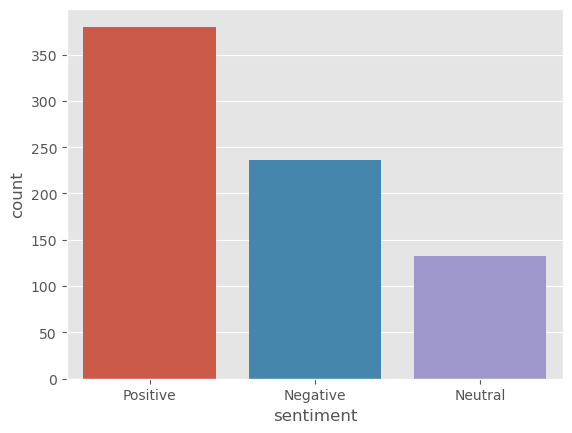

In [61]:
sns.countplot(x='sentiment' , data = df)

In [62]:
neut = df[df.sentiment=='Neutral']
print(neut)

                                                                              text  \
21   If there was ever a movie that needed word-of-mouth to promote, this is it.     
23             Plus, it was well-paced and suited its relatively short run time.     
24                                                         Give this one a look.     
25                                                                I gave it a 10     
30                                                   The problem was the script.     
..                                                                             ...   
729                                            I keep watching it over and over.     
731                  If you have not seen this movie, I definitely recommend it!     
739                                         Fans of the genre will be in heaven.     
742                                        I never walked out of a movie faster.     
745                                               In a

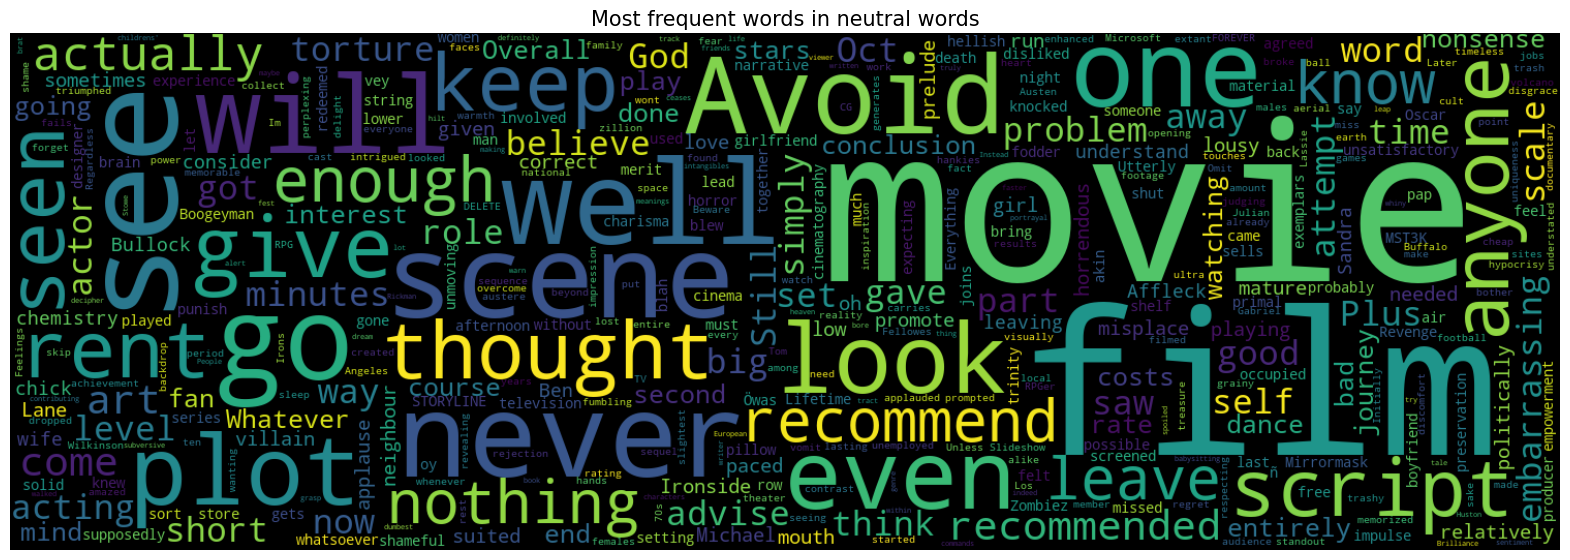

In [63]:
#use wordcloud to visualize the neutral sentiments 
text=' '.join([word for word in neut['text']])
plt.figure(figsize=(20,20),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1500,height=500).generate(text)
plt.imshow(wordcloud ,interpolation= 'bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral words', fontsize = 15)
plt.show()

                                                                                                               text  \
0                           A very, very, very slow-moving, aimless movie about a distressed, drifting young man.     
1               Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.     
4      The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.     
7                                   Saw the movie today and thought it was a good effort, good messages for kids.     
9                                                       Loved the casting of Jimmy Buffet as the science teacher.     
..                                                                                                              ...   
737                                  :) Anyway, the plot flowed smoothly and the male-bonding scenes were a hoot.     
738  The opening sequence of this gem is a class

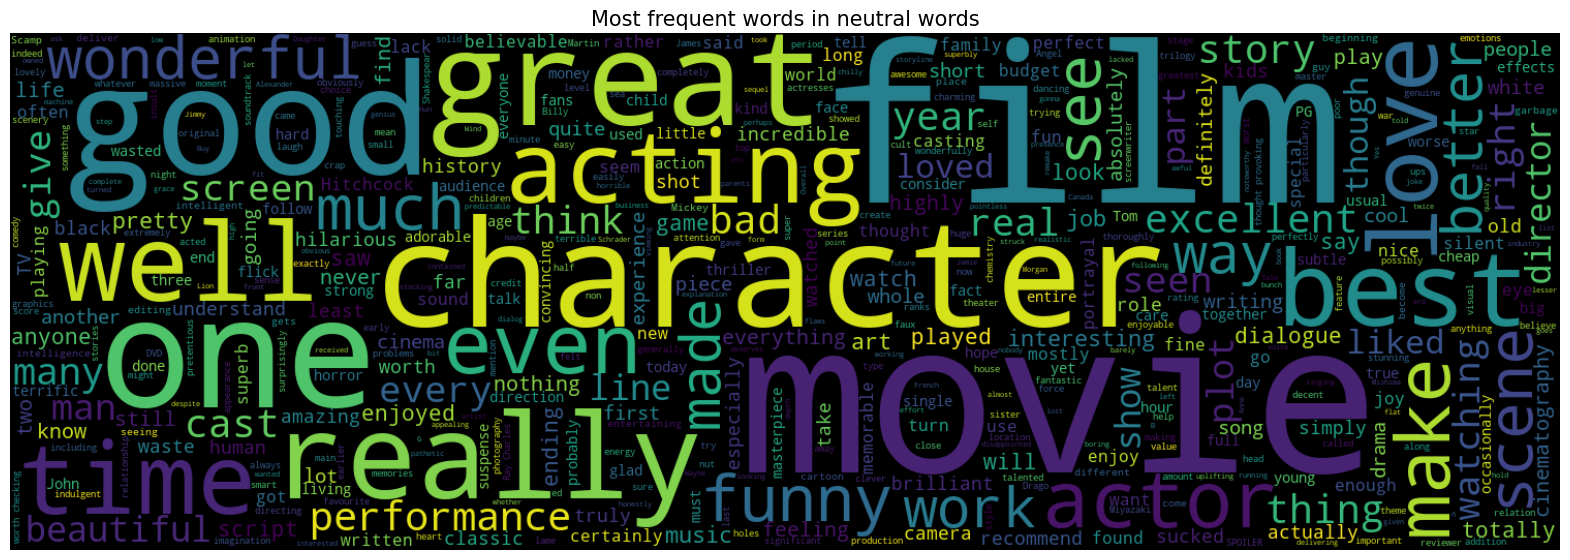

In [64]:
pos = df[df.sentiment=='Positive']
print(pos)
#use wordcloud to visualize the positive sentiments 
text=' '.join([word for word in pos['text']])
plt.figure(figsize=(20,20),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1500,height=500).generate(text)
plt.imshow(wordcloud ,interpolation= 'bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral words', fontsize = 15)
plt.show()

                                                                                                                                                                                             text  \
2    Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.     
3                                                                                                                                                    Very little music or anything to speak of.     
5                                                                              The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.     
6                                                                                                                                                                             Wasted two hours.     
8              

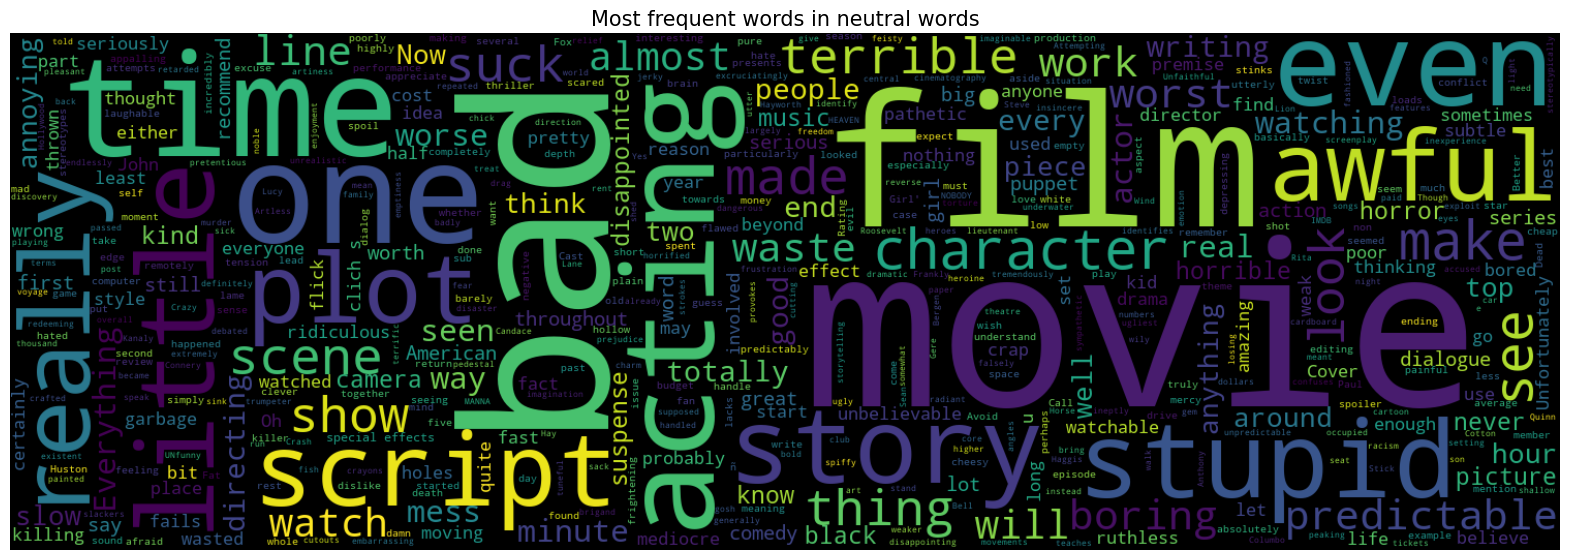

In [65]:
neg = df[df.sentiment=='Negative']
print(neg)
#use wordcloud to visualize the positive sentiments 
text=' '.join([word for word in neg['text']])
plt.figure(figsize=(20,20),facecolor='None')
wordcloud = WordCloud(max_words=500,width=1500,height=500).generate(text)
plt.imshow(wordcloud ,interpolation= 'bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral words', fontsize = 15)
plt.show()

In [66]:
#creating a bigram model 
vect = CountVectorizer(ngram_range=(1,2)).fit(df['text'])

In [67]:
feature_names = vect.get_feature_names()
print("Number of features:{}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features:12786

First 20 features:
 ['10', '10 10', '10 an', '10 and', '10 do', '10 feet', '10 for', '10 grade', '10 oct', '10 on', '10 out', '10 plus', '10 scale', '10 score', '10 simply', '10 stars', '10 to', '12', '12 years', '13']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
X = df['text']
Y = df['sentiment']
X= vect.transform(X)


In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=45)

In [72]:
print("Size of x_train:",(x_train.shape))
print("Size of y_train:",(y_train.shape))
print("Size of x_test:",(x_test.shape))
print("Size of y_test:",(y_test.shape))

Size of x_train: (523, 12786)
Size of y_train: (523,)
Size of x_test: (225, 12786)
Size of y_test: (225,)


In [73]:
#train the data with logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test of accuracy: {:.2f}%".format(logreg_acc*100))


Test of accuracy: 63.11%


In [74]:
#print confusion matrix 
print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[42  8 29]
 [ 6 14 17]
 [18  5 86]]


              precision    recall  f1-score   support

    Negative       0.64      0.53      0.58        79
     Neutral       0.52      0.38      0.44        37
    Positive       0.65      0.79      0.71       109

    accuracy                           0.63       225
   macro avg       0.60      0.57      0.58       225
weighted avg       0.62      0.63      0.62       225



In [75]:
 from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

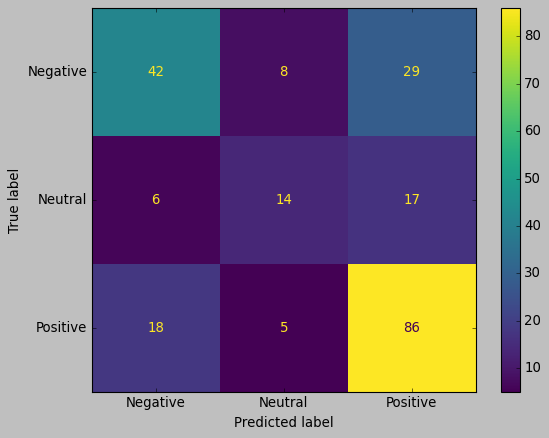

In [76]:
style.use('classic')
cm= confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()